# Importing packages from the environment into the Notebook

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv('real_estate_db.csv', encoding='latin-1') # imports the csv into the local notebook
df.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID   state state_ab         city  \
0  220336      NaN       140        16        2  Alaska       AK     Unalaska   
1  220342      NaN       140        20        2  Alaska       AK  Eagle River   
2  220343      NaN       140        20        2  Alaska       AK         Jber   
3  220345      NaN       140        20        2  Alaska       AK    Anchorage   
4  220347      NaN       140        20        2  Alaska       AK    Anchorage   

             place  type  ... female_age_mean  female_age_median  \
0    Unalaska City  City  ...        32.78177           31.91667   
1        Anchorage  City  ...        38.97956           39.66667   
2        Anchorage  City  ...        22.20427           23.16667   
3  Point Mackenzie  City  ...        37.00750           34.00000   
4        Anchorage  City  ...        34.96611           31.75000   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          19.31875                 440.46429              1894.0  0.25053   
1          20.05513                 466.65478              1947.0  0.94989   
2          13.86575                 887.67805              3570.0  0.00759   
3          22.06347                 281.49420              1049.0  0.20247   
4          20.49887                 655.98066              2905.0  0.56936   

   married  married_snp  separated  divorced  
0  0.47388      0.30134    0.03443   0.09802  
1  0.52381      0.01777    0.00782   0.13575  
2  0.50459      0.06676    0.01000   0.01838  
3  0.44428      0.05933    0.00000   0.21563  
4  0.51034      0.08315    0.06731   0.08711  

[5 rows x 80 columns]

# Cleaning the data

In [5]:
df.drop_duplicates(subset=None, inplace=True) # drops duplicate rows
df.drop('BLOCKID', axis=1, inplace=True) # drops the nan-filled column

In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True) # turns null characters into nan
df.dropna(axis=0, inplace=True) # drops nan-filled columns

In [7]:
df_sampled = df.sample(frac=0.01) # samples 0.1 of the db.

In [8]:
df_sampled.head() # prints the first five indexes of the new sampled db.

UID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
2832   225781       140        37        6     California       CA   
15543  250072       140         9       25  Massachusetts       MA   
26945  271973       140        49       39           Ohio       OH   
9589   238651       140       129       12        Florida       FL   
34845  287000       140       381       48          Texas       TX   

              city            place     type primary  ...  female_age_mean  \
2832   Los Angeles  Florence-graham     City   tract  ...         29.36517   
15543    Middleton          Danvers     City   tract  ...         41.71997   
26945     Columbus       Valleyview  Village   tract  ...         43.42380   
9589     Sopchoppy   Sopchoppy City     City   tract  ...         44.79352   
34845     Amarillo    Amarillo City     Town   tract  ...         43.71691   

       female_age_median  female_age_stdev  female_age_sample_weight  \
2832            24.16667          19.36907                 685.94506   
15543           43.25000          23.14189                 884.05400   
26945           47.66667          23.40231                 328.17910   
9589            47.83333          22.51254                 652.51404   
34845           43.16667          25.27224                 646.96492   

       female_age_samples  pct_own  married  married_snp  separated  divorced  
2832               2569.0  0.15551  0.37084      0.05566    0.00786   0.02238  
15543              3789.0  0.85914  0.45449      0.08392    0.04008   0.09499  
26945              1425.0  0.55397  0.53070      0.04475    0.03122   0.06243  
9589               2559.0  0.75139  0.58739      0.04562    0.00820   0.05894  
34845              2680.0  0.62854  0.55140      0.06063    0.00000   0.09522  

[5 rows x 79 columns]

# Function to turn hs_degree into a binary

In [9]:
# finds and prints the mean rate of hs_degree
hs_degree_mean = df_sampled[['hs_degree']].mean()
print(hs_degree_mean)

hs_degree    0.855329
dtype: float64


In [10]:
# write function to check whether or not the average person is graduated
def check_condition(value, threshold):
    if value > threshold:
        return 'Yes'
    else:
        return 'No'

# uses function to check whether values are greater or lesser and writes to new column
df_sampled['avg_person_graduated'] = df_sampled['hs_degree'].apply(lambda x: check_condition(x, 0.855329))

# verifies the counts of yesses and nos within the newly generated column
yes_count = df_sampled[df_sampled['avg_person_graduated'] == 'Yes'].shape[0]
no_count = df_sampled[df_sampled['avg_person_graduated'] == 'No'].shape[0]

# verifies whether function worked
print(f"\nNumber of 'Yes' in avg_person_graduated: {yes_count}")
print(f"Number of 'No' in avg_person_graduated: {no_count}")
df_sampled.head()


Number of 'Yes' in avg_person_graduated: 240
Number of 'No' in avg_person_graduated: 139


UID  SUMLEVEL  COUNTYID  STATEID          state state_ab  \
2832   225781       140        37        6     California       CA   
15543  250072       140         9       25  Massachusetts       MA   
26945  271973       140        49       39           Ohio       OH   
9589   238651       140       129       12        Florida       FL   
34845  287000       140       381       48          Texas       TX   

              city            place     type primary  ...  female_age_median  \
2832   Los Angeles  Florence-graham     City   tract  ...           24.16667   
15543    Middleton          Danvers     City   tract  ...           43.25000   
26945     Columbus       Valleyview  Village   tract  ...           47.66667   
9589     Sopchoppy   Sopchoppy City     City   tract  ...           47.83333   
34845     Amarillo    Amarillo City     Town   tract  ...           43.16667   

       female_age_stdev  female_age_sample_weight  female_age_samples  \
2832           19.36907                 685.94506              2569.0   
15543          23.14189                 884.05400              3789.0   
26945          23.40231                 328.17910              1425.0   
9589           22.51254                 652.51404              2559.0   
34845          25.27224                 646.96492              2680.0   

       pct_own  married  married_snp  separated  divorced  \
2832   0.15551  0.37084      0.05566    0.00786   0.02238   
15543  0.85914  0.45449      0.08392    0.04008   0.09499   
26945  0.55397  0.53070      0.04475    0.03122   0.06243   
9589   0.75139  0.58739      0.04562    0.00820   0.05894   
34845  0.62854  0.55140      0.06063    0.00000   0.09522   

       avg_person_graduated  
2832                     No  
15543                   Yes  
26945                    No  
9589                    Yes  
34845                   Yes  

[5 rows x 80 columns]

# Neural Network

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# defines x and y values for training
data_no_hs_degree = df_sampled[['debt', 'rent_mean', 'hc_mortgage_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity']]
X = data_no_hs_degree
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [13]:
# splits data into x and y trains and preds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [14]:
print(X_train) # prints X_train

          debt   rent_mean  hc_mortgage_mean  home_equity_second_mortgage  \
37157  0.80064  1008.19040        1583.18589                      0.02090   
10876  0.50223   631.59738        1113.63425                      0.01040   
11425  0.55471   692.90838        1356.91727                      0.04545   
21751  0.44398   575.02889        1354.61230                      0.01885   
5591   0.81781  1865.14264        2296.85597                      0.04658   
...        ...         ...               ...                          ...   
8332   0.42685   844.35362        1594.97288                      0.01900   
18547  0.77890   744.35669        1626.17417                      0.01662   
11638  0.60684   966.85761        1267.38734                      0.06838   
22926  0.74484  1202.97842        2395.03362                      0.00563   
33057  0.44748   876.92456        1233.29195                      0.00000   

       second_mortgage  home_equity  
37157          0.02090      0.06109  

In [15]:
print(y_train) # prints y_train

37157    0
10876    1
11425    1
21751    1
5591     0
        ..
8332     0
18547    1
11638    0
22926    1
33057    0
Name: avg_person_graduated, Length: 303, dtype: int64


In [16]:
np.isnan(X_train).any() # checks X_train for any nan values

debt                           False
rent_mean                      False
hc_mortgage_mean               False
home_equity_second_mortgage    False
second_mortgage                False
home_equity                    False
dtype: bool

In [17]:
X_train.isnull().any() # checks X_train for any null values

debt                           False
rent_mean                      False
hc_mortgage_mean               False
home_equity_second_mortgage    False
second_mortgage                False
home_equity                    False
dtype: bool

In [18]:
np.isnan(y_train).any() # checks y_train for any nan values

False

In [19]:
y_train.isnull().any() # checks y_train for any null values

False

In [20]:
# loads important models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.metrics import accuracy_score

# defines model, including two layers
model = Sequential()
model.add(Dense(units=32, activation='ReLU', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='ReLU'))
model.add(Dense(units=1, activation='sigmoid'))

#imports optimizer and learning rate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# optimizer
initial_learning_rate = 0.001  # learning rate
optimizer = Adam(learning_rate=initial_learning_rate)

# learning rate scheduler
def lr_scheduler(epoch):
    return initial_learning_rate * 0.95 ** epoch

# callbacks learning rate per epoch
lr_callback = LearningRateScheduler(lr_scheduler)

In [21]:
# defines model compiler
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# fits model
model.fit(X_train, y_train, batch_size = 1, epochs = 100, callbacks=[lr_callback])

Epoch 1/100
303/303 [==============================] - 1s 1ms/step - loss: 15.0558 - accuracy: 0.5710 - lr: 0.0010
Epoch 2/100
303/303 [==============================] - 0s 995us/step - loss: 8.7161 - accuracy: 0.5677 - lr: 9.5000e-04
Epoch 3/100
303/303 [==============================] - 0s 899us/step - loss: 4.6917 - accuracy: 0.5479 - lr: 9.0250e-04
Epoch 4/100
303/303 [==============================] - 0s 979us/step - loss: 4.7525 - accuracy: 0.5644 - lr: 8.5737e-04
Epoch 5/100
303/303 [==============================] - 0s 984us/step - loss: 2.9513 - accuracy: 0.5314 - lr: 8.1451e-04
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 4.1578 - accuracy: 0.5809 - lr: 7.7378e-04
Epoch 7/100
303/303 [==============================] - 0s 896us/step - loss: 4.6607 - accuracy: 0.5677 - lr: 7.3509e-04
Epoch 8/100
303/303 [==============================] - 0s 890us/step - loss: 4.2603 - accuracy: 0.5512 - lr: 6.9834e-04
Epoch 9/100
303/303 [==========================

In [23]:
# performs a prediction
y_hat = model.predict(X_test)

# prints out the whole accuracy
print(y_hat)

# reevaluates to binary
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# prints out the accuracy again
print(y_hat)

# prints final accuracy
print(accuracy_score(y_test, y_hat))

3/3 [==============================] - 0s 2ms/step
[[0.23502643]
 [0.2961169 ]
 [0.4932031 ]
 [0.43403912]
 [0.4593523 ]
 [0.5510712 ]
 [0.34749648]
 [0.4584676 ]
 [0.4917081 ]
 [0.28194436]
 [0.88582206]
 [0.70802295]
 [0.80991316]
 [0.4497858 ]
 [0.33945888]
 [0.425948  ]
 [0.44444188]
 [0.4307777 ]
 [0.57060665]
 [0.72185165]
 [0.501554  ]
 [0.4847684 ]
 [0.68189853]
 [0.64557004]
 [0.533359  ]
 [0.33955768]
 [0.42590883]
 [0.46182686]
 [0.42459232]
 [0.65396774]
 [0.2833641 ]
 [0.58874   ]
 [0.31368458]
 [0.5090413 ]
 [0.38550255]
 [0.450816  ]
 [0.33162898]
 [0.55960834]
 [0.38513753]
 [0.41166377]
 [0.43505612]
 [0.4191775 ]
 [0.24797109]
 [0.4148558 ]
 [0.62345886]
 [0.7065366 ]
 [0.46564233]
 [0.3202892 ]
 [0.2660842 ]
 [0.5518743 ]
 [0.39406252]
 [0.4918168 ]
 [0.3687746 ]
 [0.41380334]
 [0.4634523 ]
 [0.4127054 ]
 [0.48966607]
 [0.22266285]
 [0.3776075 ]
 [0.48379564]
 [0.70854473]
 [0.43183455]
 [0.3420717 ]
 [0.35500106]
 [0.49859002]
 [0.331662  ]
 [0.49850133]
 [0.3843104

In [24]:
accuracy_score(y_test, y_hat)

0.4868421052631579

# Heatmap

                             hs_degree  hs_degree_male  hs_degree_female  \
hs_degree                     1.000000        0.972680          0.960022   
hs_degree_male                0.972680        1.000000          0.875705   
hs_degree_female              0.960022        0.875705          1.000000   
debt                          0.274244        0.266568          0.251237   
rent_mean                     0.349819        0.351279          0.325628   
hc_mortgage_mean              0.349272        0.370659          0.301270   
home_equity_second_mortgage   0.052647        0.064618          0.032392   
second_mortgage               0.038061        0.052255          0.014058   
home_equity                   0.357177        0.359261          0.330824   

                                 debt  rent_mean  hc_mortgage_mean  \
hs_degree                    0.274244   0.349819          0.349272   
hs_degree_male               0.266568   0.351279          0.370659   
hs_degree_female             

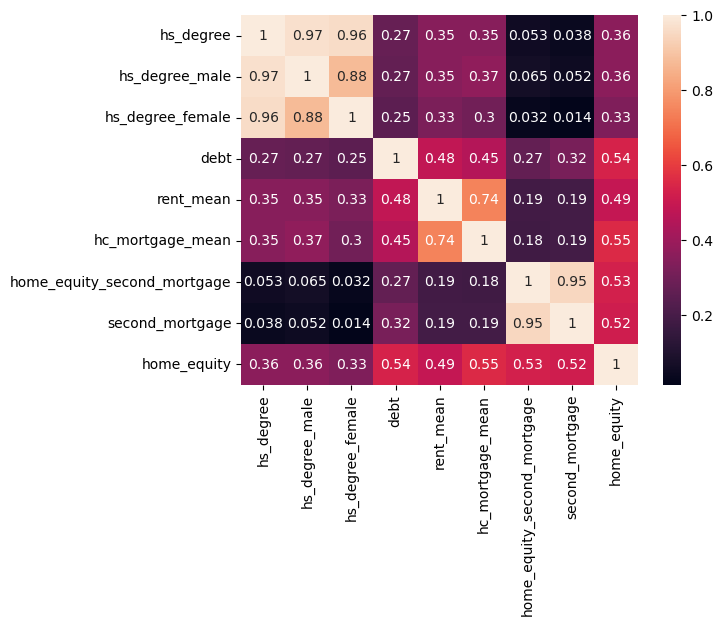

In [25]:
import matplotlib.pyplot as mp 
import seaborn as sb 
from PIL import _imaging
from PIL import Image
  
data = df_sampled[['hs_degree', 'hs_degree_male', 'hs_degree_female', 'debt', 'rent_mean', 'hc_mortgage_mean', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity']]
 
print(data.corr()) 
  
dataplot=sb.heatmap(data.corr(), annot=True)
  
mp.show() 

# Interactive US Map

In [26]:
import plotly.express as px
avg_grad_rates = df.groupby('state_ab')['hs_degree'].mean().reset_index()

fig = px.choropleth(avg_grad_rates,
                    locations='state_ab',
                    locationmode='USA-states',
                    color='hs_degree',
                    hover_name='state_ab',
                    color_continuous_scale='blues',
                    title='Average High School Graduation Rates by State')
fig.update_layout(geo_scope='usa')
fig.show()

# Scatterplot of Degree Percentage versus Debt Percentage

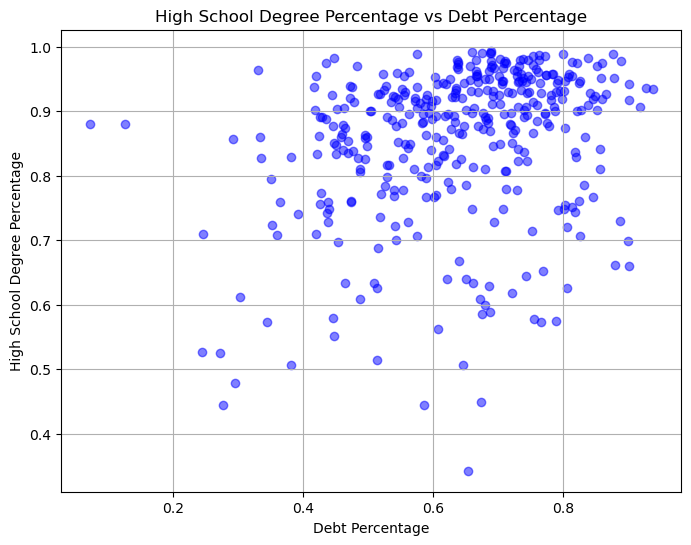

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df_sampled['debt'], df_sampled['hs_degree'], color='b', alpha=0.5)
plt.title('High School Degree Percentage vs Debt Percentage')
plt.xlabel('Debt Percentage')
plt.ylabel('High School Degree Percentage')
plt.grid(True)
plt.show()

# Line Chart of Graduation Rate versus Debt Rate

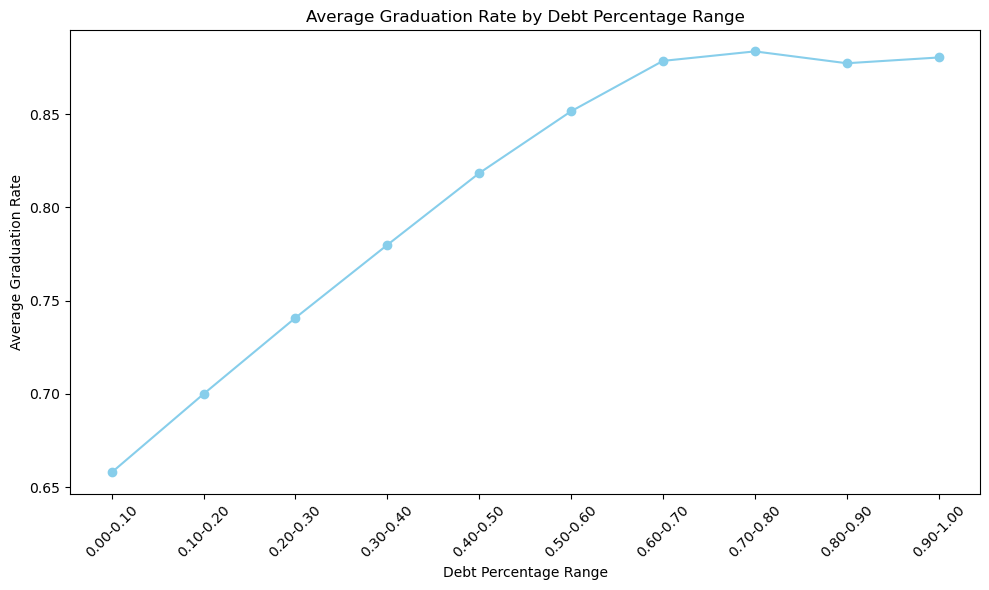

In [28]:
bins = np.linspace(0, 1, 11)  # Bins from 0 to 1 with 5 intervals
labels = [f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)]

df['debt_binned'] = pd.cut(df['debt'], bins=bins, labels=labels, right=False)

avg_graduation_rate = df.groupby('debt_binned')['hs_degree'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_graduation_rate.index, avg_graduation_rate.values, marker='o', linestyle='-', color='skyblue')

plt.xlabel('Debt Percentage Range')
plt.ylabel('Average Graduation Rate')
plt.title('Average Graduation Rate by Debt Percentage Range')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Random Forest Classifier

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [30]:
# identify the x and y
X = df_sampled[['debt', 'rent_mean']]
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [31]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# creates the random forest classifier
clf = RandomForestClassifier(random_state=42)

In [33]:
# trains the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# predicts values based on previously split test set
y_pred = clf.predict(X_test)

In [35]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.61
Confusion Matrix:
[[10 20]
 [10 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        30
           1       0.64      0.78      0.71        46

    accuracy                           0.61        76
   macro avg       0.57      0.56      0.55        76
weighted avg       0.59      0.61      0.59        76



C:\Users\jp_gl\anaconda3\envs\tf-6x26\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



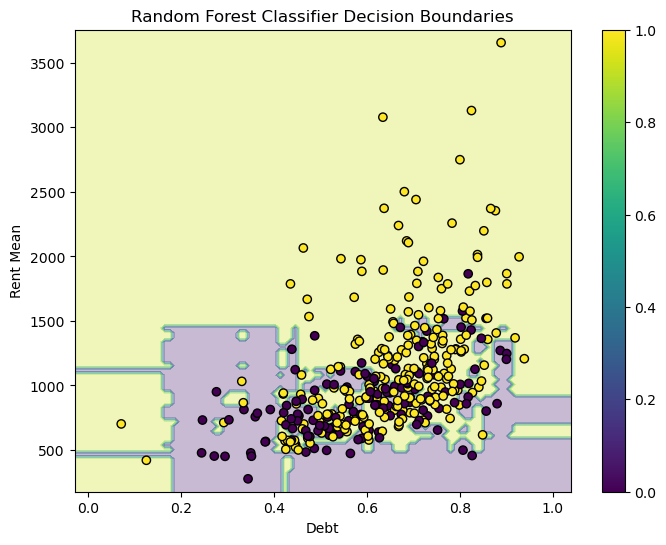

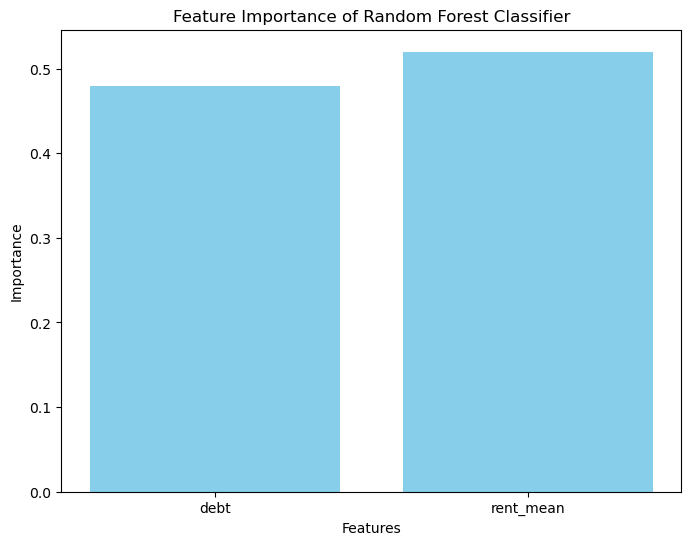

In [36]:
# plots boundaries
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    xx, yy = np.meshgrid(np.linspace(X.values[:, 0].min() - 0.1, X.values[:, 0].max() + 0.1, 100),
                         np.linspace(X.values[:, 1].min() - 100, X.values[:, 1].max() + 100, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X.values[:, 0], X.values[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.xlabel('Debt')
    plt.ylabel('Rent Mean')
    plt.title('Random Forest Classifier Decision Boundaries')
    plt.colorbar()
    plt.show()

# plots features
plt.figure(figsize=(8, 6))
plt.bar(X.columns, clf.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest Classifier')
plt.show()

# Decision Tree Classifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [38]:
# find x and y
X = df_sampled[['debt', 'rent_mean']]
y = df_sampled['avg_person_graduated'].apply(lambda x: 1 if x=='Yes' else 0)

In [39]:
# separates data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# creates a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [41]:
# trains the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# predicts x_test
y_pred = clf.predict(X_test)

In [43]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.57
Confusion Matrix:
[[15 15]
 [18 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.50      0.48        30
           1       0.65      0.61      0.63        46

    accuracy                           0.57        76
   macro avg       0.55      0.55      0.55        76
weighted avg       0.57      0.57      0.57        76



C:\Users\jp_gl\anaconda3\envs\tf-6x26\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



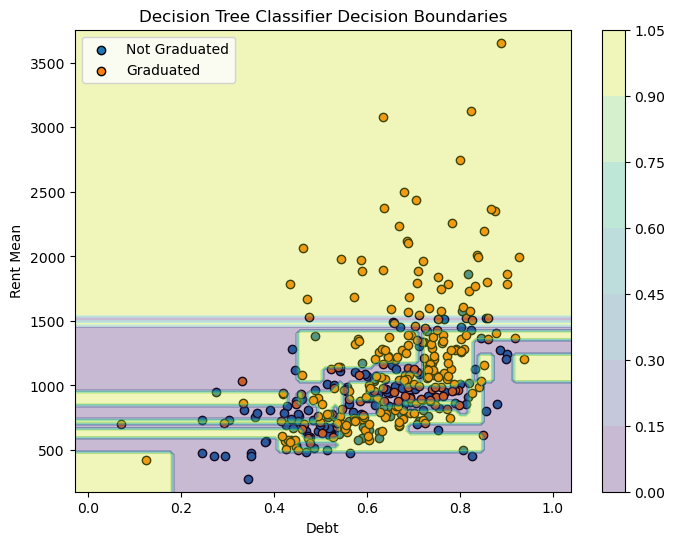

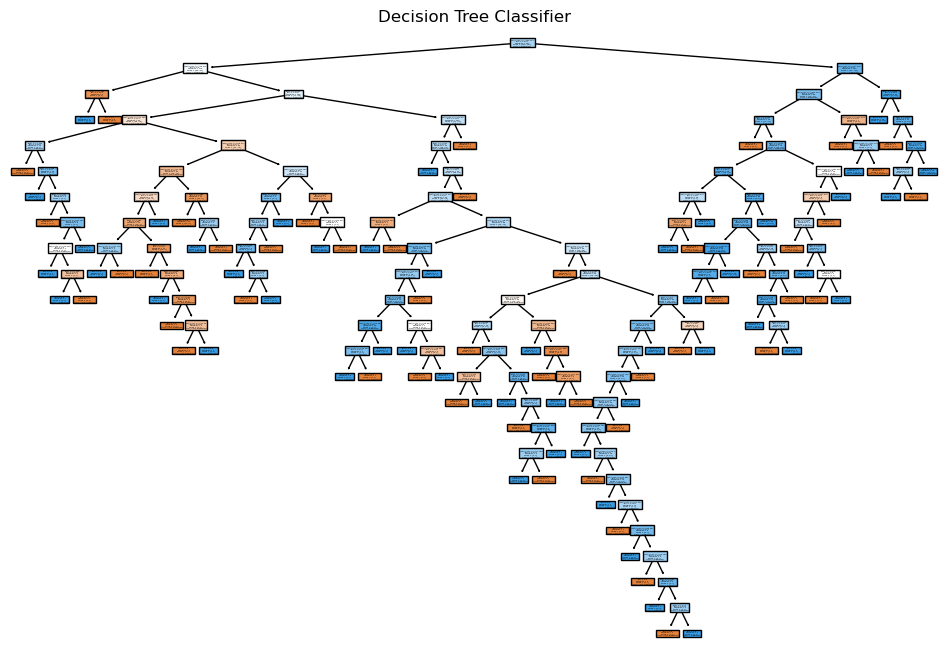

In [44]:
# plots the boundaries
plt.figure(figsize=(8, 6))

# plots points of each class
plt.scatter(X[y == 0]['debt'], X[y == 0]['rent_mean'], cmap='viridis', edgecolors='k', label='Not Graduated')
plt.scatter(X[y == 1]['debt'], X[y == 1]['rent_mean'], cmap='viridis', edgecolors='k', label='Graduated')

# creates a meshgrid to plot the decision boundaries
xx, yy = np.meshgrid(np.linspace(X['debt'].min() - 0.1, X['debt'].max() + 0.1, 100),
                     np.linspace(X['rent_mean'].min() - 100, X['rent_mean'].max() + 100, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# plots the contour filled regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# labels and title
plt.xlabel('Debt')
plt.ylabel('Rent Mean')
plt.title('Decision Tree Classifier Decision Boundaries')
plt.colorbar()
plt.legend()
plt.show()
# plots the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Graduated', 'Graduated'])
plt.title('Decision Tree Classifier')
plt.show()

# Pair Plot of Rent Mean versus Highschool Degree Rate

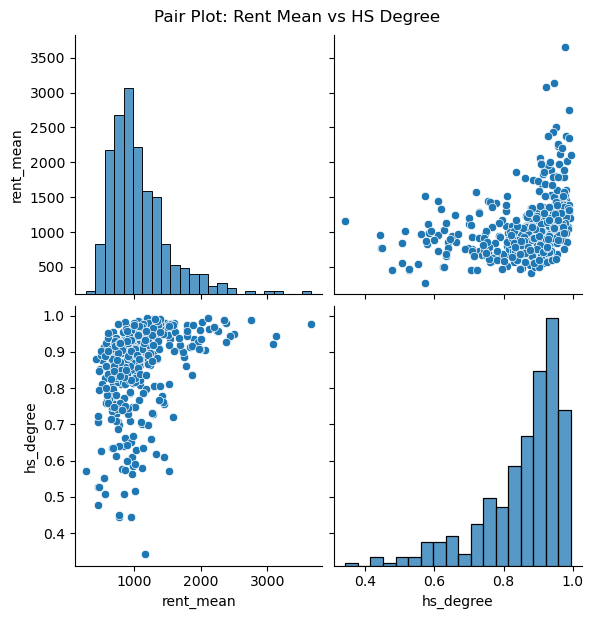

In [45]:
sb.pairplot(df_sampled[['rent_mean', 'hs_degree']], height=3)
plt.suptitle('Pair Plot: Rent Mean vs HS Degree', y=1.02)
plt.show()

# Joint Plot of Rent Mean versus High School Degree Rate

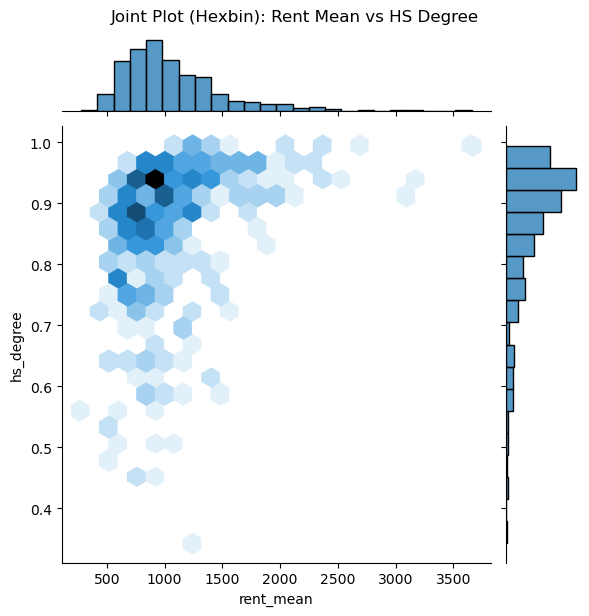

In [46]:
sb.jointplot(x='rent_mean', y='hs_degree', data=df_sampled, kind='hex', height=6)
plt.suptitle('Joint Plot (Hexbin): Rent Mean vs HS Degree', y=1.02)
plt.show()

# Scatter Plot of Rent Mean versus High School Degree Rate

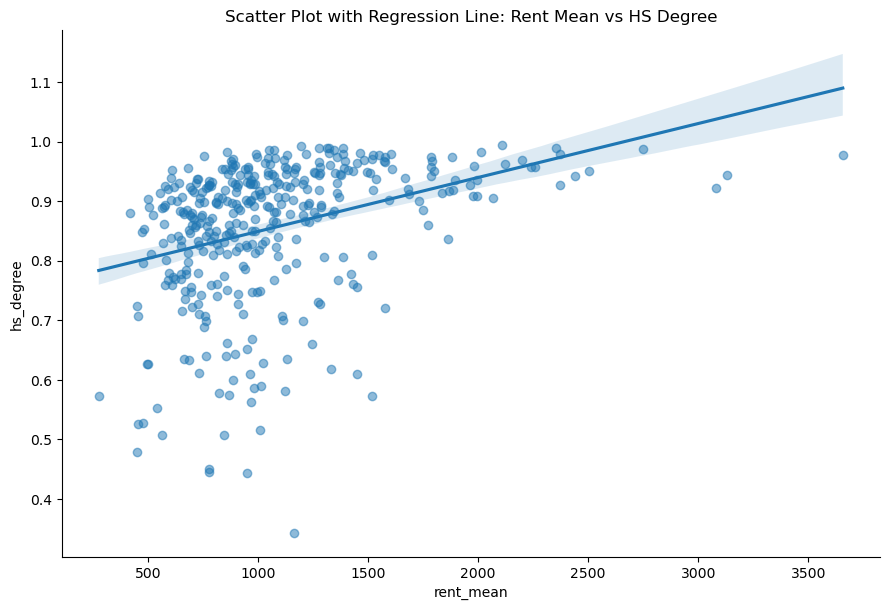

In [47]:
sb.lmplot(x='rent_mean', y='hs_degree', data=df_sampled, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot with Regression Line: Rent Mean vs HS Degree')
plt.show()